# Effects of Differing Reference Subsidy Interpolation Techniques on Error

In [7]:
from math import exp 

BLOCK_TIME_IN_SECONDS = 6
BLOCKS_PER_DAY = (24 * 60 * 60) / 6
BLOCKS_PER_YEAR = 365.25 * BLOCKS_PER_DAY 

def reference_subsidy(t, t_constant_init, t_decay_init, subsidy_init, subsidy_max):
    if t <= t_constant_init:
        return 0
    elif t <= t_decay_init:
        return subsidy_init
    elif t > t_decay_init:
        init_duration = t_decay_init - t_constant_init
        subsidy_decay_max = subsidy_max - subsidy_init * init_duration
        subsidy = subsidy_init * exp(-subsidy_init
                                      * (t - t_decay_init) / subsidy_decay_max)
        return subsidy
    

C1 = lambda t: reference_subsidy(t, 0, 4 * BLOCKS_PER_YEAR, 7, 160_000_000)
C2 = lambda t: reference_subsidy(t, 0, 0, 7, 160_000_000)
S = lambda t: C1(t) + C2(t)

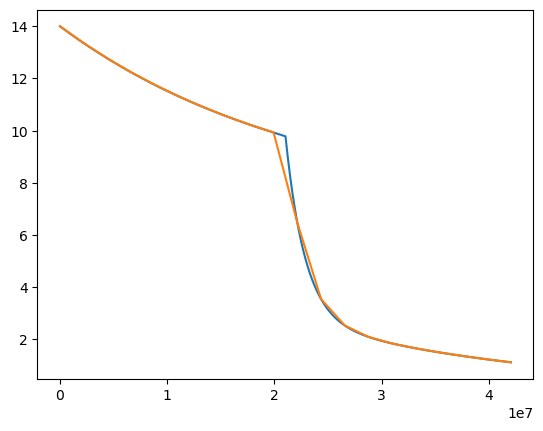

In [33]:
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, PPoly
import numpy as np 


SIMULATION_DURATION = 8 * BLOCKS_PER_YEAR
x = np.arange(1, SIMULATION_DURATION, 100)
y = np.vectorize(S)(x)

N_pieces = 20
x_linear = np.linspace(min(x), max(x), N_pieces)
y_linear = np.interp(x_linear, x, y)

cs = PPoly(x, y)
xs = np.linspace(min(x), max(x), N_pieces)
ys = cs(xs)

plt.plot(x, y)
#plt.plot(x_linear, y_linear)
plt.plot(xs, ys)
